# Higgs Boson Detection 2024
*Searching for exotic particles in high-energy physics with machine learning*

## Overview
The goal of this competition is to classify events into two classes: events that produce the exotic Higgs Boson particle, and those that do not. Each event is a simulated particle collision represented by 28 features that describe the trajectories of decay particles. These are realistic simulations of particle collisions occuring in the ATLAS detector at the Large Hadron Collider at CERN, near Geneva, Switzerland.

An analysis like this was used to discover the Higgs Boson in 2012; a machine learning classifier was trained on simulation and calibration data, then used to analyze real data from the experiment. Improved machine learning methods for this type of data could enable physicists to make new discoveries faster. It is thought that there are additional particles yet to be discovered, so more sensitive machine learning methods could help scientists discover new physics.

## Dataset

This data set is a sample from the HIGGS data set published with [Baldi, Sadowski, and Whiteson, Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://www.nature.com/articles/ncomms5308) and available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS).

In [1]:
%%bash
mkdir -p data

In [2]:
!wget "https://archive.ics.uci.edu/static/public/280/higgs.zip" -P data -q --show-progress

higgs.zip               [ <=>                ]   2.62G  55.8MB/s    in 55s     


In [3]:
!unzip data/higgs.zip

Archive:  data/higgs.zip
  inflating: HIGGS.csv.gz            


In [4]:
!gzip -d HIGGS.csv.gz

In [5]:
!ls

data  HIGGS.csv  sample_data


In [6]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
column_names = ['lable', 'lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
df = pd.read_csv('HIGGS.csv', header=None, nrows=200000)
df.columns=column_names

In [9]:
df.head()

,lable,lep_pt,lep_eta,lep_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [10]:
features_low = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

features_high = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
            'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
            'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [11]:
Y = df['lable'].values
X = df[[col for col in features]]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

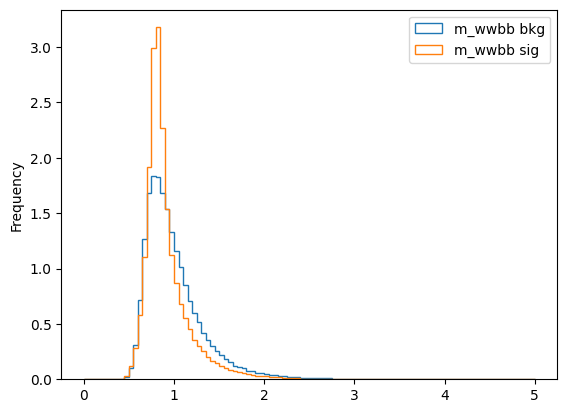

In [12]:
import matplotlib.pyplot as plt

#plot a few features
var_name = 'm_wwbb'
ax = df[df['lable']==0].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density=True)
#ax.set_yscale('log')
df[df['lable']==1].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density = True, ax=ax)
ax.legend(labels=[var_name+' bkg', var_name+' sig'])

In [13]:
# Enjoy!

In [72]:
Y = df['lable'].values
X = df[[col for col in features]]

In [89]:
# baseline keras model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    Convolution2D,
    MaxPooling2D,
    Dropout,
    Flatten,
)

VARS = features
NDIM = len(VARS)
inputs = Input(shape=(NDIM,), name="input")

x = Dense(128, activation="relu")(inputs)
x = Dropout(0.25)(x) # .3

x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x) # .2

x = Dense(32, activation="relu")(x)
x = Dropout(0.05)(x) # .1

x = Dense(16, activation="relu")(x)
x = Dropout(0.05)(x) # .1

outputs = Dense(1, name="output", kernel_initializer="normal", activation="sigmoid")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# Print the model summary
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [91]:
# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=15)

In [92]:
# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    "dense_model.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [93]:
# Train classifier
history = model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=1024,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_split=0.25,
)

Epoch 1/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5656 - loss: 0.6772

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5666 - loss: 0.6767 - val_accuracy: 0.6511 - val_loss: 0.6245
Epoch 2/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6442 - loss: 0.6301

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6445 - loss: 0.6299 - val_accuracy: 0.6745 - val_loss: 0.6088
Epoch 3/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6630 - loss: 0.6179

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6632 - loss: 0.6176 - val_accuracy: 0.6821 - val_loss: 0.5984
Epoch 4/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6733 - loss: 0.6059

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6734 - loss: 0.6058 - val_accuracy: 0.6901 - val_loss: 0.5865
Epoch 5/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6833 - loss: 0.5942

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6834 - loss: 0.5942 - val_accuracy: 0.6967 - val_loss: 0.5781
Epoch 6/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6889 - loss: 0.5882

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6890 - loss: 0.5880 - val_accuracy: 0.6996 - val_loss: 0.5702
Epoch 7/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6936 - loss: 0.5814

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6937 - loss: 0.5812 - val_accuracy: 0.7026 - val_loss: 0.5652
Epoch 8/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6989 - loss: 0.5734

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6989 - loss: 0.5734 - val_accuracy: 0.7064 - val_loss: 0.5606
Epoch 9/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7027 - loss: 0.5686

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7027 - loss: 0.5686 - val_accuracy: 0.7093 - val_loss: 0.5584
Epoch 10/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7048 - loss: 0.5637

103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7048 - loss: 0.5637 - val_accuracy: 0.7120 - val_loss: 0.5523
Epoch 11/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7033 - loss: 0.5647

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7035 - loss: 0.5646 - val_accuracy: 0.7140 - val_loss: 0.5518
Epoch 12/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7103 - loss: 0.5575

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7103 - loss: 0.5575 - val_accuracy: 0.7163 - val_loss: 0.5491
Epoch 13/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7091 - loss: 0.5595

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7092 - loss: 0.5593 - val_accuracy: 0.7156 - val_loss: 0.5458
Epoch 14/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7126 - loss: 0.5550

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7126 - loss: 0.5550 - val_accuracy: 0.7181 - val_loss: 0.5437
Epoch 15/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7140 - loss: 0.5526 - val_accuracy: 0.7205 - val_loss: 0.5438
Epoch 16/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7186 - loss: 0.5471

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7184 - loss: 0.5472 - val_accuracy: 0.7211 - val_loss: 0.5405
Epoch 17/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7171 - loss: 0.5465

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7170 - loss: 0.5466 - val_accuracy: 0.7228 - val_loss: 0.5400
Epoch 18/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7180 - loss: 0.5460

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7181 - loss: 0.5459 - val_accuracy: 0.7237 - val_loss: 0.5385
Epoch 19/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7199 - loss: 0.5439

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7199 - loss: 0.5439 - val_accuracy: 0.7235 - val_loss: 0.5383
Epoch 20/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7238 - loss: 0.5402

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7237 - loss: 0.5402 - val_accuracy: 0.7247 - val_loss: 0.5372
Epoch 21/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7236 - loss: 0.5389

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7236 - loss: 0.5389 - val_accuracy: 0.7238 - val_loss: 0.5368
Epoch 22/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7240 - loss: 0.5395

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7239 - loss: 0.5395 - val_accuracy: 0.7256 - val_loss: 0.5353
Epoch 23/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7238 - loss: 0.5393

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7238 - loss: 0.5393 - val_accuracy: 0.7255 - val_loss: 0.5339
Epoch 24/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7216 - loss: 0.5399

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7217 - loss: 0.5398 - val_accuracy: 0.7285 - val_loss: 0.5326
Epoch 25/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7231 - loss: 0.5365 - val_accuracy: 0.7260 - val_loss: 0.5329
Epoch 26/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7231 - loss: 0.5382 - val_accuracy: 0.7289 - val_loss: 0.5330
Epoch 27/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7252 - loss: 0.5340

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7253 - loss: 0.5340 - val_accuracy: 0.7280 - val_loss: 0.5318
Epoch 28/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7292 - loss: 0.5328

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7291 - loss: 0.5329 - val_accuracy: 0.7293 - val_loss: 0.5312
Epoch 29/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7303 - loss: 0.5300

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7302 - loss: 0.5300 - val_accuracy: 0.7303 - val_loss: 0.5305
Epoch 30/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7280 - loss: 0.5331

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7280 - loss: 0.5331 - val_accuracy: 0.7297 - val_loss: 0.5299
Epoch 31/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7297 - loss: 0.5287

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7297 - loss: 0.5288 - val_accuracy: 0.7312 - val_loss: 0.5295
Epoch 32/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7286 - loss: 0.5321 - val_accuracy: 0.7305 - val_loss: 0.5305
Epoch 33/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7288 - loss: 0.5303

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7288 - loss: 0.5304 - val_accuracy: 0.7320 - val_loss: 0.5285
Epoch 34/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7311 - loss: 0.5282

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7311 - loss: 0.5282 - val_accuracy: 0.7318 - val_loss: 0.5277
Epoch 35/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7305 - loss: 0.5279 

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7305 - loss: 0.5279 - val_accuracy: 0.7325 - val_loss: 0.5271
Epoch 36/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7323 - loss: 0.5245 - val_accuracy: 0.7321 - val_loss: 0.5281
Epoch 37/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7311 - loss: 0.5264

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7311 - loss: 0.5265 - val_accuracy: 0.7342 - val_loss: 0.5264
Epoch 38/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7320 - loss: 0.5247 - val_accuracy: 0.7339 - val_loss: 0.5268
Epoch 39/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7286 - loss: 0.5266

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7287 - loss: 0.5266 - val_accuracy: 0.7330 - val_loss: 0.5262
Epoch 40/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7349 - loss: 0.5236

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7349 - loss: 0.5236 - val_accuracy: 0.7327 - val_loss: 0.5261
Epoch 41/1000
 94/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7335 - loss: 0.5233

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7335 - loss: 0.5235 - val_accuracy: 0.7334 - val_loss: 0.5249
Epoch 42/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7348 - loss: 0.5232 - val_accuracy: 0.7334 - val_loss: 0.5265
Epoch 43/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7312 - loss: 0.5246 - val_accuracy: 0.7337 - val_loss: 0.5249
Epoch 44/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7365 - loss: 0.5197

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7363 - loss: 0.5200 - val_accuracy: 0.7347 - val_loss: 0.5248
Epoch 45/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7354 - loss: 0.5232 - val_accuracy: 0.7334 - val_loss: 0.5254
Epoch 46/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7337 - loss: 0.5234

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7337 - loss: 0.5234 - val_accuracy: 0.7334 - val_loss: 0.5244
Epoch 47/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7363 - loss: 0.5216 - val_accuracy: 0.7351 - val_loss: 0.5244
Epoch 48/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7380 - loss: 0.5195 - val_accuracy: 0.7348 - val_loss: 0.5244
Epoch 49/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7382 - loss: 0.5192

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7381 - loss: 0.5193 - val_accuracy: 0.7349 - val_loss: 0.5242
Epoch 50/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7361 - loss: 0.5185 - val_accuracy: 0.7364 - val_loss: 0.5243
Epoch 51/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7365 - loss: 0.5200 - val_accuracy: 0.7345 - val_loss: 0.5252
Epoch 52/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7388 - loss: 0.5159

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7387 - loss: 0.5161 - val_accuracy: 0.7352 - val_loss: 0.5237
Epoch 53/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7408 - loss: 0.5185

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7407 - loss: 0.5185 - val_accuracy: 0.7352 - val_loss: 0.5236
Epoch 54/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7364 - loss: 0.5195

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7364 - loss: 0.5195 - val_accuracy: 0.7354 - val_loss: 0.5232
Epoch 55/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7381 - loss: 0.5174 - val_accuracy: 0.7346 - val_loss: 0.5240
Epoch 56/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7385 - loss: 0.5182 - val_accuracy: 0.7349 - val_loss: 0.5240
Epoch 57/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7402 - loss: 0.5141

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7402 - loss: 0.5142 - val_accuracy: 0.7358 - val_loss: 0.5229
Epoch 58/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7397 - loss: 0.5168 - val_accuracy: 0.7348 - val_loss: 0.5232
Epoch 59/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7392 - loss: 0.5160

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7392 - loss: 0.5160 - val_accuracy: 0.7347 - val_loss: 0.5221
Epoch 60/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7417 - loss: 0.5138 - val_accuracy: 0.7356 - val_loss: 0.5225
Epoch 61/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7435 - loss: 0.5112 - val_accuracy: 0.7353 - val_loss: 0.5228
Epoch 62/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7372 - loss: 0.5144 - val_accuracy: 0.7371 - val_loss: 0.5222
Epoch 63/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7407 - loss: 0.5138 - val_accuracy: 0.7347 - val_loss: 0.5234
Epoch 64/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7417 - loss: 0.5137 - val_accuracy: 0.7360 - val_loss: 0.5234
Epoch 65/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7402 - loss: 0.5160 - val_accuracy: 0.7346 - val_loss: 0.5234
Epoch 66/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7425 - loss: 0.5143

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7425 - loss: 0.5143 - val_accuracy: 0.7357 - val_loss: 0.5218
Epoch 67/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7427 - loss: 0.5138 - val_accuracy: 0.7351 - val_loss: 0.5218
Epoch 68/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7406 - loss: 0.5139 - val_accuracy: 0.7360 - val_loss: 0.5220
Epoch 69/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7436 - loss: 0.5130

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7435 - loss: 0.5130 - val_accuracy: 0.7367 - val_loss: 0.5206
Epoch 70/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7412 - loss: 0.5132 - val_accuracy: 0.7353 - val_loss: 0.5213
Epoch 71/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7428 - loss: 0.5124 - val_accuracy: 0.7360 - val_loss: 0.5222
Epoch 72/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7424 - loss: 0.5132 - val_accuracy: 0.7357 - val_loss: 0.5215
Epoch 73/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7417 - loss: 0.5118 - val_accuracy: 0.7353 - val_loss: 0.5216
Epoch 74/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7417 - loss: 0.5123

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7417 - loss: 0.5123 - val_accuracy: 0.7374 - val_loss: 0.5203
Epoch 75/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7420 - loss: 0.5120 - val_accuracy: 0.7365 - val_loss: 0.5210
Epoch 76/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7430 - loss: 0.5110 - val_accuracy: 0.7367 - val_loss: 0.5216
Epoch 77/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7451 - loss: 0.5079 - val_accuracy: 0.7372 - val_loss: 0.5213
Epoch 78/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7429 - loss: 0.5112 - val_accuracy: 0.7376 - val_loss: 0.5211
Epoch 79/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7427 - loss: 0.5139 - val_accuracy: 0.7373 - val_loss: 0.5212
Epoch 80/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7426 - loss: 0.5089 - val_accuracy: 0.7373 - val_loss: 0.5203
Epoch 81/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7441 - loss: 0.5104 - val_ac

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step


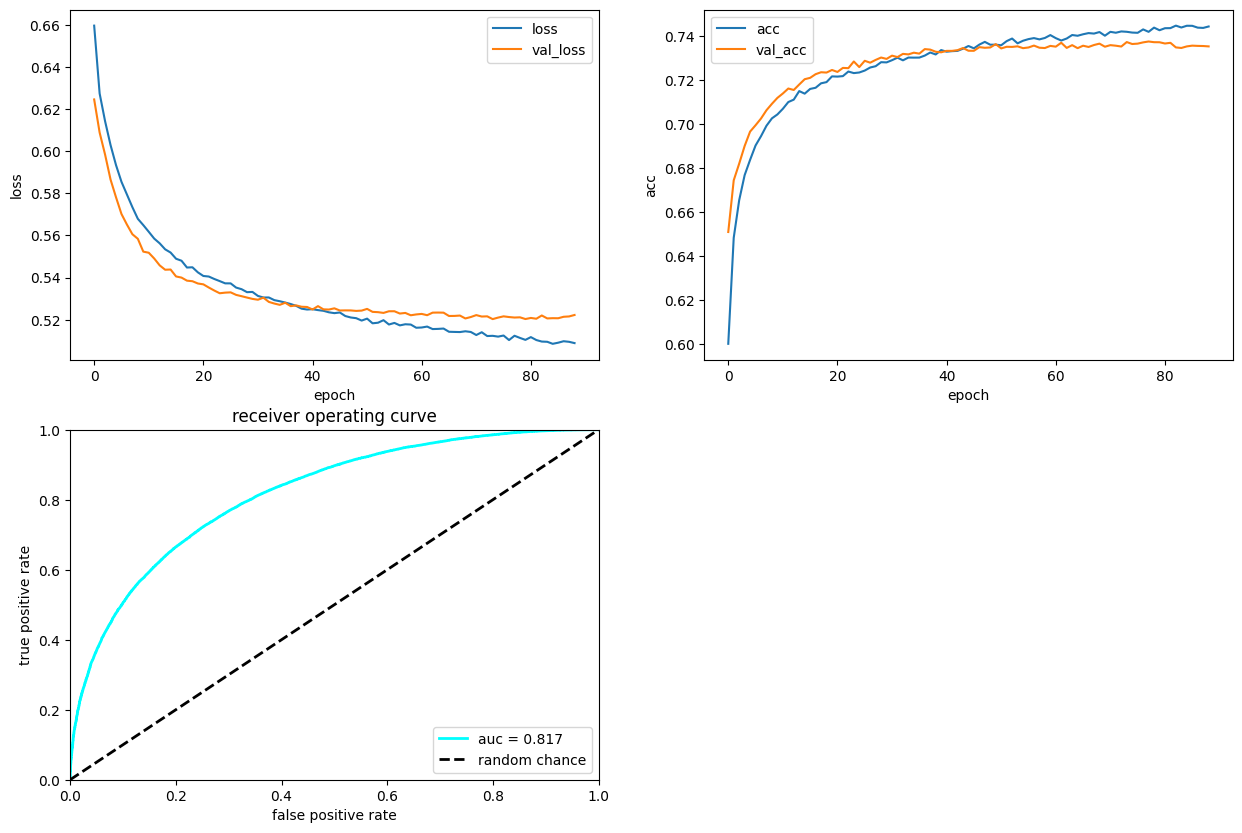

In [94]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history["loss"], label="loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.legend(loc="upper right")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history["accuracy"], label="acc")
ax.plot(history.history["val_accuracy"], label="val_acc")
ax.legend(loc="upper left")
ax.set_xlabel("epoch")
ax.set_ylabel("acc")

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("receiver operating curve")
ax.legend(loc="lower right")
plt.show()

In [95]:
df["dense"] = model.predict(X)  # add prediction to array
print(df.loc[:30, ["lable", "dense"]])

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 946us/step
    lable     dense
0     1.0  0.701440
1     1.0  0.867173
2     1.0  0.971902
3     0.0  0.790114
4     1.0  0.513272
5     0.0  0.119848
6     1.0  0.972115
7     1.0  0.915142
8     1.0  0.909651
9     1.0  0.963883
10    1.0  0.792243
11    0.0  0.586025
12    1.0  0.919179
13    1.0  0.945341
14    1.0  0.774263
15    0.0  0.081499
16    1.0  0.648214
17    0.0  0.233937
18    0.0  0.846647
19    1.0  0.568160
20    1.0  0.967426
21    1.0  0.662512
22    0.0  0.226856
23    1.0  0.884047
24    0.0  0.445198
25    0.0  0.602973
26    1.0  0.858817
27    0.0  0.073507
28    1.0  0.598699
29    0.0  0.259804
30    1.0  0.434882


In [96]:
threshold = .6

final = np.zeros(df.shape[0])
for i in range(len(final)):
  if df.loc[i, "dense"] >= threshold:
    final[i] = 1.
  else:
    final[i] = 0.


success = 0
for i in range(len(final)):
  if df.loc[i, 'lable'] == final[i]:
    success += 1

print()
print('Threshold = %.2f' % (threshold))
print('Success Rate = %.3f' % (success/len(final)))


Threshold = 0.60
Success Rate = 0.743
